# Desc

[PyTorchZeroToAll](https://www.youtube.com/playlist?list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m)

[Official Recipes](https://pytorch.org/tutorials/recipes/recipes_index.html)

http://cs231n.stanford.edu/slides/2020/lecture_6.pdf

## Automatic Differentiation
https://blog.csdn.net/aws3217150/article/details/70214422

https://www.youtube.com/watch?v=ma2KXWblllc&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&index=4

# Computational Graphs

https://github.com/pytorch/pytorch/issues/5059

https://towardsdatascience.com/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c

https://www.tutorialspoint.com/python_deep_learning/python_deep_learning_computational_graphs.htm

```
x y z
\*/ |
 a  |
 \+/
  b
  | sum
  c
```

## Numpy

In [2]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)
# print(x, '\n', y, '\n', z)

a = x * y
b = a + z
c = np.sum(b)

grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

# print(sum(sum(grad_x * x)))
# print(sum(sum(grad_y * y)))
# print(sum(sum(grad_z * z)))
print(c)

6.717008537800067


## Pytorch

In [5]:
import torch
# torch.manual_seed(0)

N, D = 3, 4

# t_x = torch.randn(N, D)
# t_y = torch.randn(N, D)
# t_z = torch.randn(N, D)
t_x = torch.tensor(x)
t_y = torch.tensor(y)
t_z = torch.tensor(z)
# print(t_x, '\n', t_y, '\n', t_z)

a = t_x * t_y
b = a + t_z
c = torch.sum(b)

print(c)

tensor(6.7170, dtype=torch.float64)


# Linear

## Model Framework

In [ ]:
# guess w only
# y = x * w
# real: y = 2x
# our model for the forward pass
def forward(x):
    return x * w

# Loss manually
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

# backword manually
# compute gradient
# y_pred = x * w
# loss = (y_pred - y) ** 2
# d_loss/d_w = 2 * x * (x*w - y)
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x*w - y)

In [ ]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

## loss graph (w and mse)

In [ ]:
import numpy as np

In [ ]:
# List of weights / Mean square Error (Mse) for each input
w_list = []
mse_list = []

# w is random guess to predit y_pred
for w in np.arange(0.0, 4.1, 0.2):
    # Print the weights and initialize the lost
    print("w =", w)
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        # For each input and output, calculate y_hat
        # Compute the total loss and add to the total error
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)  # which is square error
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    # Now compute the Mean squared error (mse) of each
    # Aggregate the weight/mse from this run
    print("MSE =", l_sum / 3)
    print()
    w_list.append(w)
    mse_list.append(l_sum / 3)

w = 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE = 18.666666666666668

w = 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE = 15.120000000000003

w = 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE = 11.946666666666667

w = 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE = 9.146666666666663

w = 0.8
	 1.0 2.0 0.8 1.44
	 2.0 4.0 1.6 5.76
	 3.0 6.0 2.4000000000000004 12.959999999999997
MSE = 6.719999999999999

w = 1.0
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE = 4.666666666666667

w = 1.2000000000000002
	 1.0 2.0 1.2000000000000002 0.6399999999999997
	 2.0 4.0 2.4000000000000004 2.5599999999999987
	 3.0 6.0 3.6000000000000005 5.759999999999997
MSE = 2.986666666666665

w = 1.4000000000000001
	 1.0 2.0 1.4000000000000001 0.359999999999

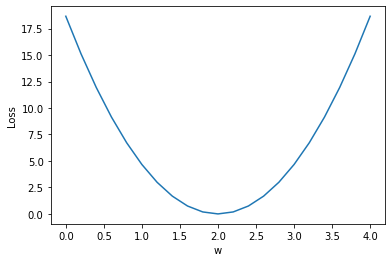

In [ ]:
import matplotlib.pyplot as plt

# Plot loss graph
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## Manual Gradient

In [ ]:
# random guss w
w = 0.5

# y = 2*x + 1, so x = 4 should return 8
# Before training
print("(before) forward(4): ", forward(4))
print()


# Training loop
for epoch in range(15):
    for x_val, y_val in zip(x_data, y_data):
        # Compute derivative w.r.t to the learned weights
        # Update the weights
        # Compute the loss and print progress
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad  # update w
        print("\tgrad: ", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)
    print("epoch:", epoch, "w=", round(w, 2), "loss=", round(l, 2), '\n')

# After training
print("after: ", forward(4))

(before) forward(4):  2.0

	grad:  1.0 2.0 -3.0
	grad:  2.0 4.0 -11.76
	grad:  3.0 6.0 -24.34
epoch: 0 w= 0.89 loss= 11.07 

	grad:  1.0 2.0 -2.22
	grad:  2.0 4.0 -8.69
	grad:  3.0 6.0 -18.0
epoch: 1 w= 1.18 loss= 6.05 

	grad:  1.0 2.0 -1.64
	grad:  2.0 4.0 -6.43
	grad:  3.0 6.0 -13.31
epoch: 2 w= 1.39 loss= 3.31 

	grad:  1.0 2.0 -1.21
	grad:  2.0 4.0 -4.75
	grad:  3.0 6.0 -9.84
epoch: 3 w= 1.55 loss= 1.81 

	grad:  1.0 2.0 -0.9
	grad:  2.0 4.0 -3.51
	grad:  3.0 6.0 -7.27
epoch: 4 w= 1.67 loss= 0.99 

	grad:  1.0 2.0 -0.66
	grad:  2.0 4.0 -2.6
	grad:  3.0 6.0 -5.38
epoch: 5 w= 1.76 loss= 0.54 

	grad:  1.0 2.0 -0.49
	grad:  2.0 4.0 -1.92
	grad:  3.0 6.0 -3.98
epoch: 6 w= 1.82 loss= 0.3 

	grad:  1.0 2.0 -0.36
	grad:  2.0 4.0 -1.42
	grad:  3.0 6.0 -2.94
epoch: 7 w= 1.87 loss= 0.16 

	grad:  1.0 2.0 -0.27
	grad:  2.0 4.0 -1.05
	grad:  3.0 6.0 -2.17
epoch: 8 w= 1.9 loss= 0.09 

	grad:  1.0 2.0 -0.2
	grad:  2.0 4.0 -0.78
	grad:  3.0 6.0 -1.61
epoch: 9 w= 1.93 loss= 0.05 

	grad:  1.0 2.0

# Auto Gradient Version

We use different loss function!

可能有一些requires_grad的原因在里面

In [ ]:
import torch

def loss_new(y_pred, y_val):
    return (y_pred - y_val)**2

# # 'Tensor' object is not callable
# def loss_new(x, y_val):
#     return (x * w - y_val)**2

In [ ]:
# random guss w
w = torch.tensor([1.0], requires_grad=True)

# Before training
print("(before) forward(4): ", forward(4))
print()

# Training loop
for epoch in range(15):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val)  # 1) Forward pass
        # l = loss(x_val, y_val)  # => 'Tensor' object is not callable
        l = loss_new(y_pred, y_val)  # 2) Compute loss
        l.backward()  # 3) Back propagation to update weights
        print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()  # update w
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
    print("epoch:", epoch, "w=", w.data, "loss=", l.item(), '\n')

# After training
print("after: ", forward(4))

(before) forward(4):  tensor([4.], grad_fn=<MulBackward0>)

	grad:  tensor([1.]) tensor([2.]) -2.0
	grad:  tensor([2.]) tensor([4.]) -7.840000152587891
	grad:  tensor([3.]) tensor([6.]) -16.228801727294922
epoch: 0 w= tensor([1.2607]) loss= 7.315943717956543 

	grad:  tensor([1.]) tensor([2.]) -1.478623867034912
	grad:  tensor([2.]) tensor([4.]) -5.796205520629883
	grad:  tensor([3.]) tensor([6.]) -11.998146057128906
epoch: 1 w= tensor([1.4534]) loss= 3.9987640380859375 

	grad:  tensor([1.]) tensor([2.]) -1.0931644439697266
	grad:  tensor([2.]) tensor([4.]) -4.285204887390137
	grad:  tensor([3.]) tensor([6.]) -8.870372772216797
epoch: 2 w= tensor([1.5959]) loss= 2.1856532096862793 

	grad:  tensor([1.]) tensor([2.]) -0.8081896305084229
	grad:  tensor([2.]) tensor([4.]) -3.1681032180786133
	grad:  tensor([3.]) tensor([6.]) -6.557973861694336
epoch: 3 w= tensor([1.7012]) loss= 1.1946394443511963 

	grad:  tensor([1.]) tensor([2.]) -0.5975041389465332
	grad:  tensor([2.]) tensor([4.]) -2

# Linear Model (Torch)

https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer.zero_grad

https://pytorch.org/tutorials/beginner/nn_tutorial.html?highlight=zero_grad

https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer.step

https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch


We need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. This is convenient while training RNNs


In [ ]:
from torch import nn
import torch
from torch import tensor

In [ ]:
x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

In [ ]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

In [ ]:
# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # learn rate

# Training loop (forward + backward)
for epoch in range(500):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    # print('Data: {}, Predict: {}'.format(y_data, y_pred))
    
    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    if epoch % 50 == 0:
        print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a [[backward]] pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 111.7068862915039 
Epoch: 50 | Loss: 0.18679173290729523 
Epoch: 100 | Loss: 0.09057698398828506 
Epoch: 150 | Loss: 0.043921686708927155 
Epoch: 200 | Loss: 0.021298028528690338 
Epoch: 250 | Loss: 0.010327618569135666 
Epoch: 300 | Loss: 0.005007944535464048 
Epoch: 350 | Loss: 0.0024283973034471273 
Epoch: 400 | Loss: 0.001177570316940546 
Epoch: 450 | Loss: 0.0005710131372325122 


In [ ]:
# After training
hour_var = tensor([[4.0]])  # create var
y_pred = model(hour_var)  # forward
print("Prediction (after training)",  4, y_pred.data[0][0].item())

Prediction (after training) 4 7.980732440948486
